In [78]:
import numpy as np
import pandas as pd

In [49]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt 

In [50]:
df=pd.read_csv('AAPL.csv')

In [51]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-23,136.820007,138.589996,135.630005,138.270004,137.449265,72433800
1,2022-06-24,139.899994,141.910004,139.770004,141.660004,140.819153,89116800
2,2022-06-27,142.699997,143.490005,140.970001,141.660004,140.819153,70207900
3,2022-06-28,142.130005,143.419998,137.320007,137.440002,136.624176,67083400
4,2022-06-29,137.460007,140.669998,136.669998,139.229996,138.403564,66242400


In [52]:
df1=df.reset_index()['Close']

In [53]:
df1.shape

(251,)

In [54]:
df1

0      138.270004
1      141.660004
2      141.660004
3      137.440002
4      139.229996
          ...    
246    186.009995
247    184.919998
248    185.009995
249    183.960007
250    187.000000
Name: Close, Length: 251, dtype: float64

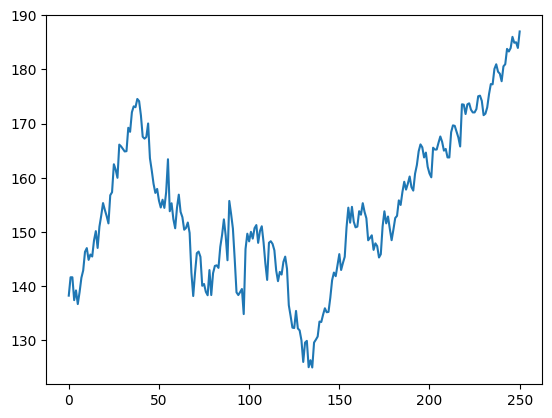

In [55]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [56]:
import numpy 

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(numpy.array(df1).reshape(-1,1))

In [58]:
print(df1)

[[2.13778741e-01]
 [2.68473801e-01]
 [2.68473801e-01]
 [2.00387293e-01]
 [2.29267478e-01]
 [1.88770627e-01]
 [2.24427159e-01]
 [2.66860281e-01]
 [2.88802842e-01]
 [3.44143401e-01]
 [3.55275814e-01]
 [3.20264554e-01]
 [3.36237544e-01]
 [3.30267941e-01]
 [3.78347900e-01]
 [4.05776053e-01]
 [3.55760067e-01]
 [4.19167501e-01]
 [4.52081230e-01]
 [4.89351525e-01]
 [4.69022226e-01]
 [4.50629213e-01]
 [4.28848140e-01]
 [5.12584615e-01]
 [5.21619997e-01]
 [6.04872478e-01]
 [5.88738242e-01]
 [5.64536888e-01]
 [6.63278574e-01]
 [6.58115505e-01]
 [6.50693886e-01]
 [6.42949275e-01]
 [6.43756035e-01]
 [7.13456048e-01]
 [7.01355371e-01]
 [7.59599979e-01]
 [7.77186232e-01]
 [7.74604706e-01]
 [7.99128809e-01]
 [7.92674970e-01]
 [7.50242090e-01]
 [6.86511906e-01]
 [6.81026088e-01]
 [6.85866408e-01]
 [7.26201998e-01]
 [6.22781480e-01]
 [5.86640953e-01]
 [5.46789373e-01]
 [5.19522466e-01]
 [5.31461897e-01]
 [4.96773145e-01]
 [4.76121339e-01]
 [4.99193425e-01]
 [4.74992071e-01]
 [5.21942505e-01]
 [6.197159

In [59]:
##spliting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [60]:
training_size,test_size

(163, 88)

In [61]:
len(train_data),len(test_data)

(163, 88)

In [62]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(datax),numpy.array(datay)

In [63]:
#reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [64]:
print(x_train)

[[0.21377874 0.2684738  0.2684738  ... 0.15892219 0.35253303 0.39819295]
 [0.2684738  0.2684738  0.20038729 ... 0.35253303 0.39819295 0.37528236]
 [0.2684738  0.20038729 0.22926748 ... 0.39819295 0.37528236 0.40367852]
 ...
 [0.41432718 0.47531458 0.5143594  ... 0.43094543 0.47805737 0.43401097]
 [0.47531458 0.5143594  0.46305264 ... 0.47805737 0.43401097 0.41706997]
 [0.5143594  0.46305264 0.44724115 ... 0.43401097 0.41706997 0.41932876]]


In [65]:
print(x_test.shape),print(y_test.shape)

(0,)
(0,)


(None, None)

In [66]:
print(x_train.shape),print(y_train.shape)

(62, 100)
(62,)


(None, None)

In [67]:
##Create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [68]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [69]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.1062
Epoch 2/100
1/1 [==============================] - 0s 232ms/step - loss: 0.0777
Epoch 3/100
1/1 [==============================] - 0s 234ms/step - loss: 0.0572
Epoch 4/100
1/1 [==============================] - 0s 260ms/step - loss: 0.0410
Epoch 5/100
1/1 [==============================] - 0s 294ms/step - loss: 0.0280
Epoch 6/100
1/1 [==============================] - 0s 272ms/step - loss: 0.0198
Epoch 7/100
1/1 [==============================] - 0s 240ms/step - loss: 0.0198
Epoch 8/100
1/1 [==============================] - 0s 262ms/step - loss: 0.0260
Epoch 9/100
1/1 [==============================] - 0s 268ms/step - loss: 0.0267
Epoch 10/100
1/1 [==============================] - 0s 248ms/step - loss: 0.0228
Epoch 11/100
1/1 [==============================] - 0s 232ms/step - loss: 0.0188
Epoch 12/100
1/1 [==============================] - 0s 234ms/step - loss: 0.0169
Epoch 13/100
1/1 [====================

In [70]:
import tensorflow as tf

In [71]:
tf.__version__

'2.12.0'

In [72]:
##Lets do the prediction and check performance metrices
train_predict=model.predict(x_train)


2/2 [==============================] - 2s 41ms/step


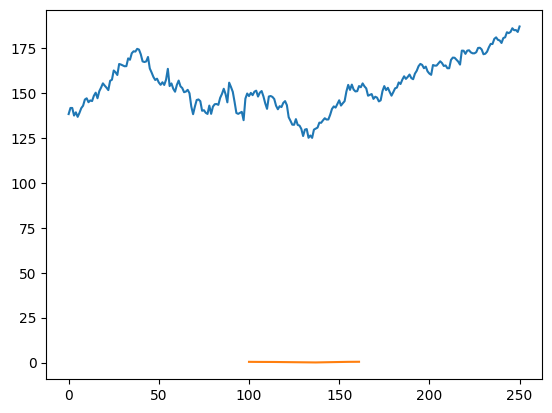

In [73]:
###plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.show()

In [74]:
len(test_data)

88

In [75]:
x_input=test_data[44:].reshape(1,-1)
x_input.shape

(1, 44)

In [76]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [77]:
temp_input

[0.6716681991770797,
 0.6453695557259009,
 0.6503711366390221,
 0.6252017606388303,
 0.6250402730700095,
 0.700064616002035,
 0.7205549183339017,
 0.7191028854903414,
 0.7021618892144939,
 0.6845756364355129,
 0.6577927400229395,
 0.7833173225241694,
 0.7821878130596409,
 0.7542756491960803,
 0.7831558349553482,
 0.7862213720770552,
 0.7671830864545135,
 0.7591159684196853,
 0.7591159684196853,
 0.7691191141116915,
 0.8071959273703166,
 0.8089707094722143,
 0.7934817299056922,
 0.750887362816036,
 0.7554049166470675,
 0.7739594333352966,
 0.8133267757344251,
 0.8434979585270428,
 0.842691198320852,
 0.8885123642217314,
 0.9023878233758715,
 0.8802840006316233,
 0.8743144139570305,
 0.8518878258202083,
 0.896256975011763,
 0.9025493270789289,
 0.9482089892767509,
 0.9404646366344966,
 0.9507905315848402,
 0.9840270256198598,
 0.9664407567066426,
 0.9678927895502039,
 0.9509520352878975,
 1.0]